## СТАНДАРТИЗАЦИЯ ВЕКТОРОВ

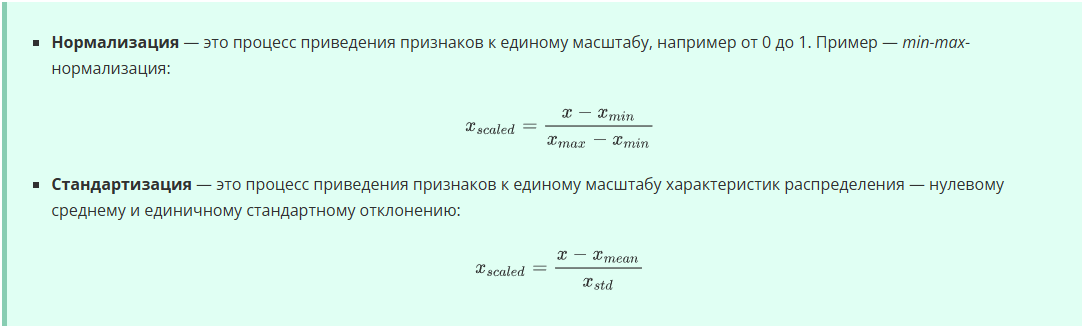
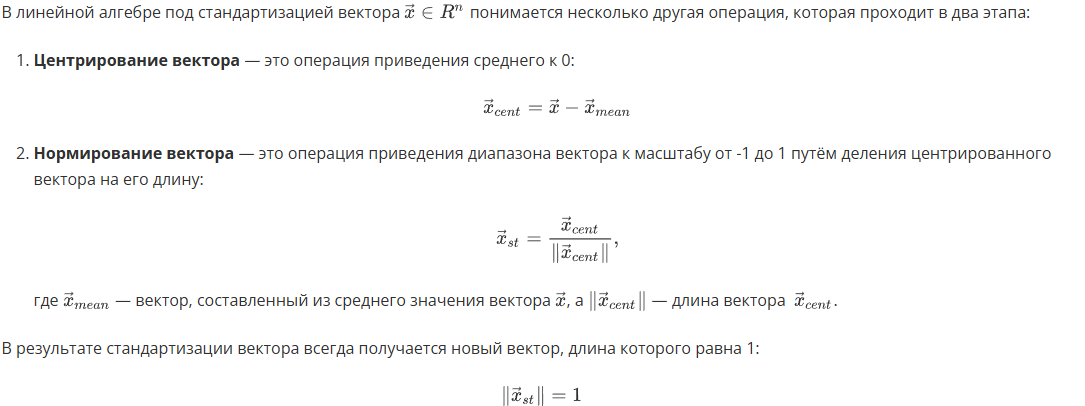
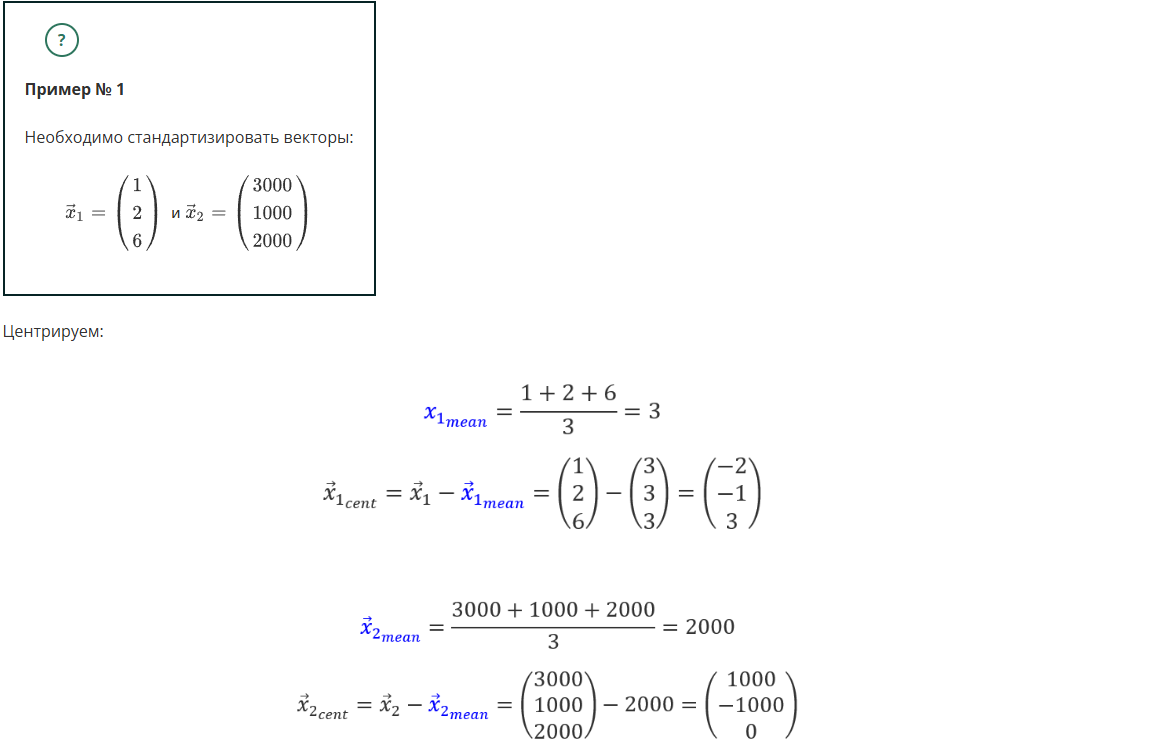
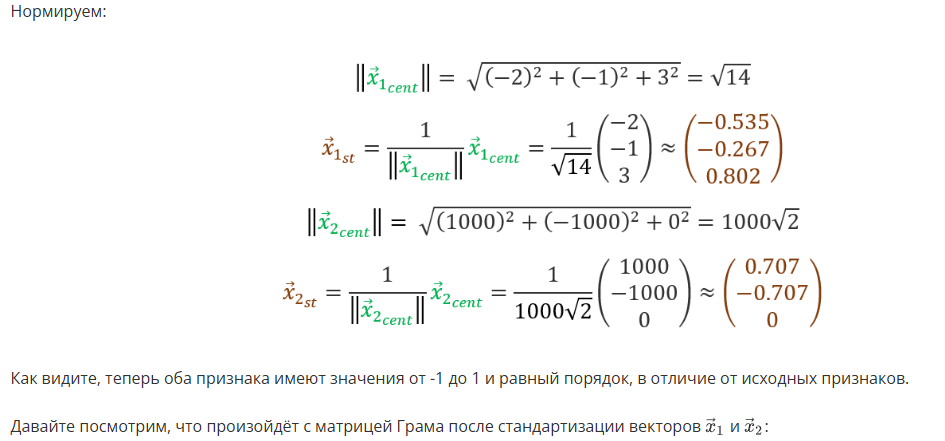
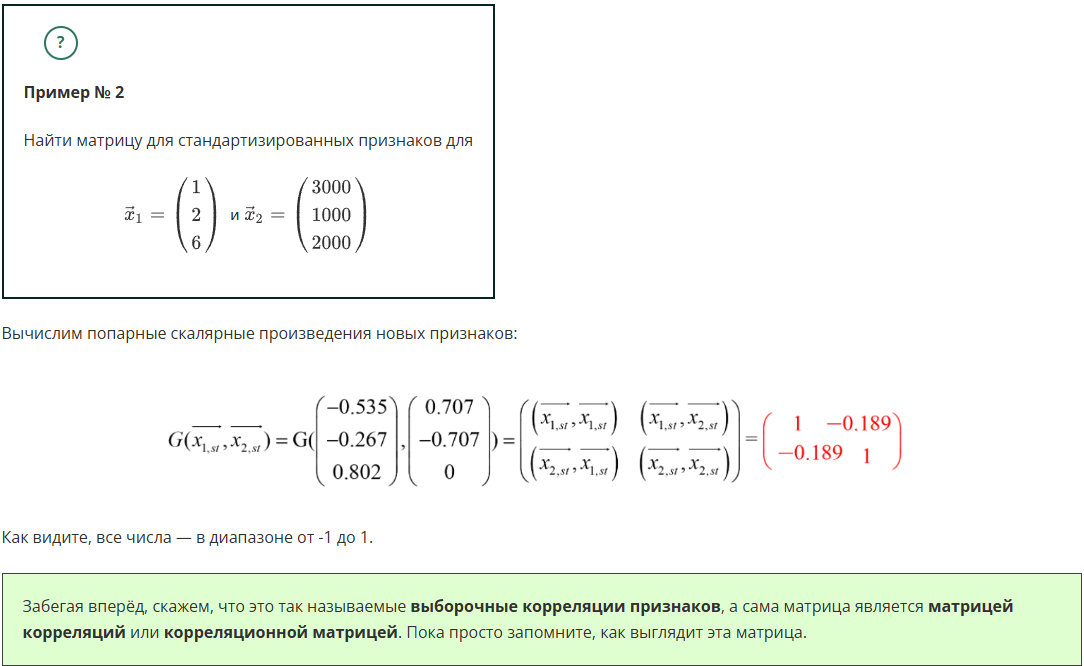
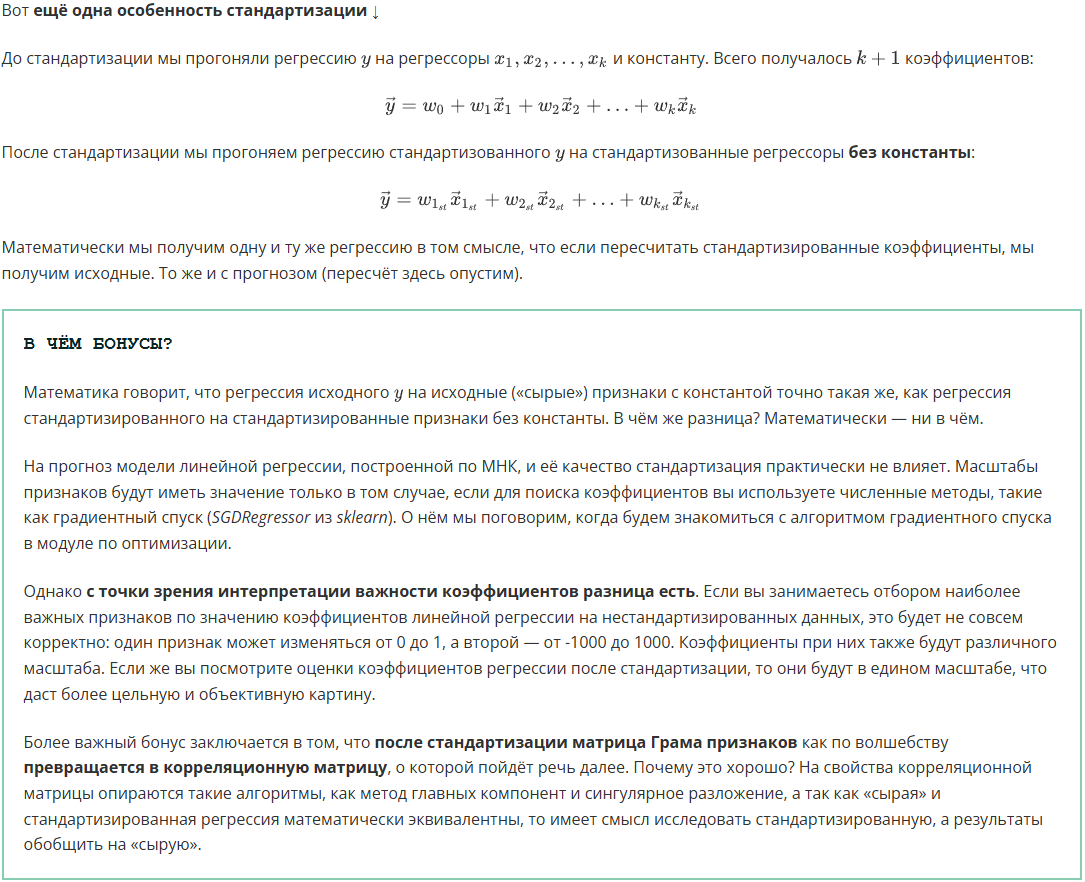

## Решение на Python

In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
# Для начала посмотрим на статистические характеристики с помощью метода describe():

boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


Видим, что каждый из признаков измеряется в различных единицах и изменяется в различных диапазонах: например, CHAS лежит в диапазоне от 0 до 1, а вот CRIM — в диапазоне от 0.006 до 88.976.

Рассмотрим модель линейной регрессии по МНК без стандартизации. Помним, что необходимо добавить столбец из единиц:

In [3]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Давайте вспомним интерпретацию коэффициентов построенной модели линейной регрессии, которую мы изучали в модуле «ML-2. Обучение с учителем: регрессия». Значение коэффициента  wi означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении xi на 1.

Например, если количество низкостатусного населения (*LSTAT*) увеличится на 1 %, то медианная цена домов в районе (в среднем) упадёт на 0.6 тысяч долларов. А если среднее количество комнат (*RM*) в районе станет больше на 1, то медианная стоимость домов в районе (в среднем) увеличится на 5 тысяч долларов.

> Тут в голову может прийти мысль: судя по значению коэффициентов, количество комнат (*RM*) оказывает на стоимость жилья большее влияние, чем процент низкостатусного населения (*LSTAT*). Однако такой вывод будет ошибочным. Мы не учитываем, что признаки, а значит и коэффициенты линейной регрессии, лежат в разных масштабах. Чтобы говорить о важности влияния признаков на модель, нужно строить её на стандартизированных данных.

Помним, что для построения стандартизированной линейной регрессии нам не нужен вектор свободных коэффициентов, а значит и столбец из единиц тоже не понадобится.

Сначала центрируем векторы, которые находятся в столбцах матрицы **A**. Для этого вычтем среднее, вычисленное по строкам матрицы **A** в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

> **Примечание**. Обратите внимание, что для функции linalg.norm() обязательно необходимо указать параметр axis=0, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности. С определением нормы матрицы и тем, как она считается, вы можете ознакомиться в документации к функции norm().

In [4]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean(axis=0)
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


Теперь векторы имеют одинаковые средние значения и стандартные отклонения. Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1:

In [5]:
print(np.linalg.norm(A_st, axis=0))
## [1. 1. 1. 1.]

[1. 1. 1. 1.]


Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной **y** по тому же принципу:

In [6]:
# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

In [7]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


Итак, мы видим картину, прямо противоположную той, что видели ранее. Теперь модуль коэффициента   будет выше, чем модуль коэффициента . Значит, процент низкостатусного населения оказывает большее влияние на значение стоимости жилья, чем количество комнат.

Однако теперь интерпретировать сами коэффициенты в тех же измерениях у нас не получится.

> **Сделаем важный вывод ↓**

Для того чтобы проинтерпретировать оценки коэффициентов линейной регрессии (понять, каков будет прирост целевой переменной при изменении фактора на 1 условную единицу), нам достаточно построить линейную регрессию в обычном виде без стандартизации и получить обычный вектор **w**.

Однако, чтобы корректно говорить о том, какой фактор оказывает на прогноз большее влияние, необходимо рассматривать стандартизированную оценку вектора коэффициентов **w_st**.

In [8]:
# Давайте поближе взглянем на матрицу Грама для стандартизированных факторов:

# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


На самом деле мы с вами только что вычислили **матрицу выборочных корреляций** наших исходных факторов. Мы уже сталкивались с ней много раз в разделах по разведывательному анализу данных и машинному обучению, правда, вычисляли её мы с помощью функции Pandas, а теперь научились делать это вручную.

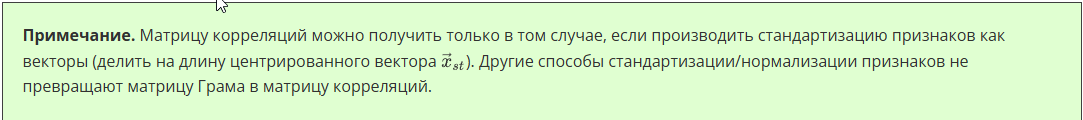

## КОРРЕЛЯЦИОННАЯ МАТРИЦА

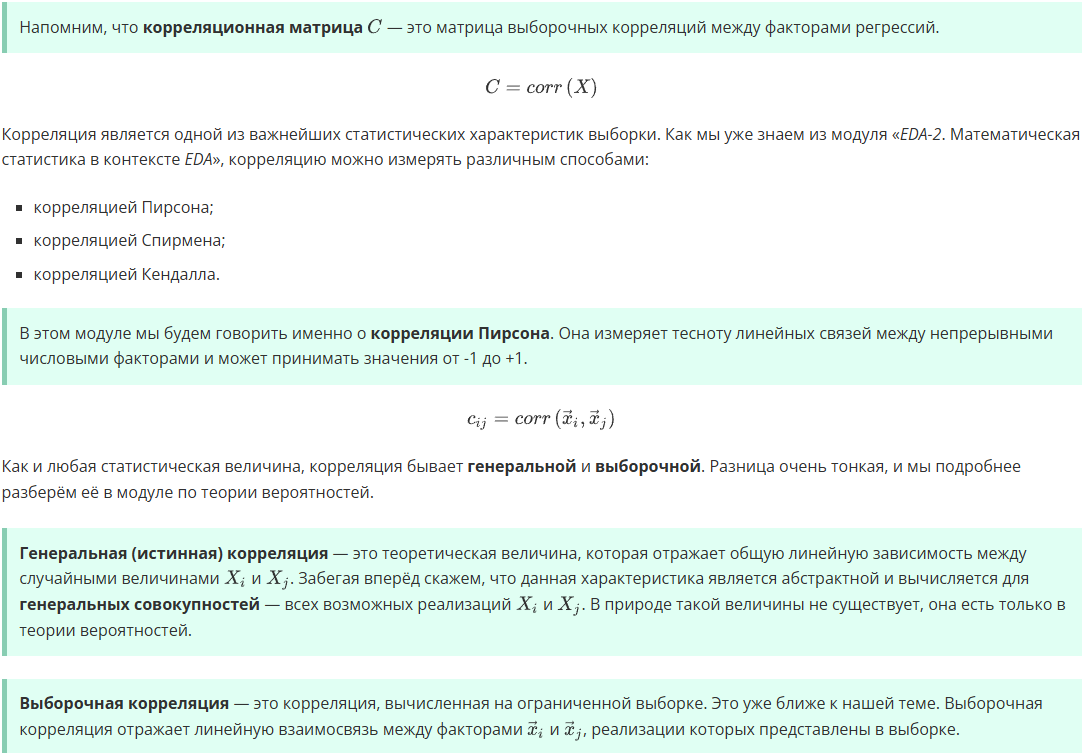
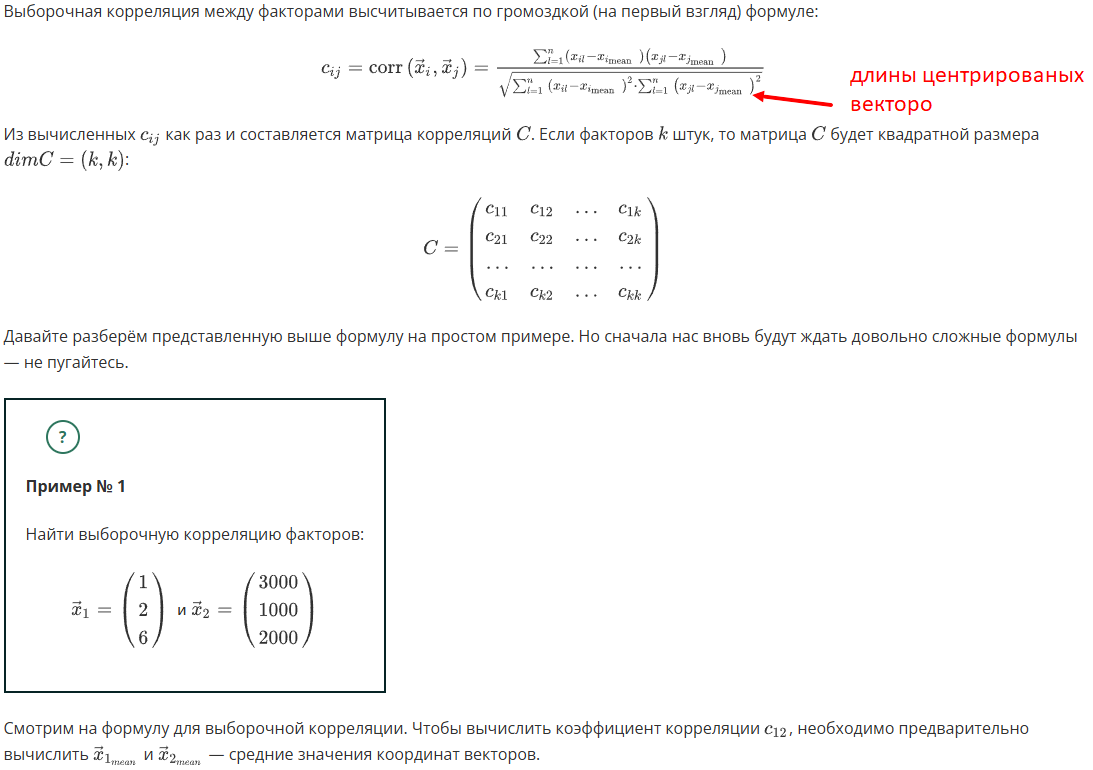
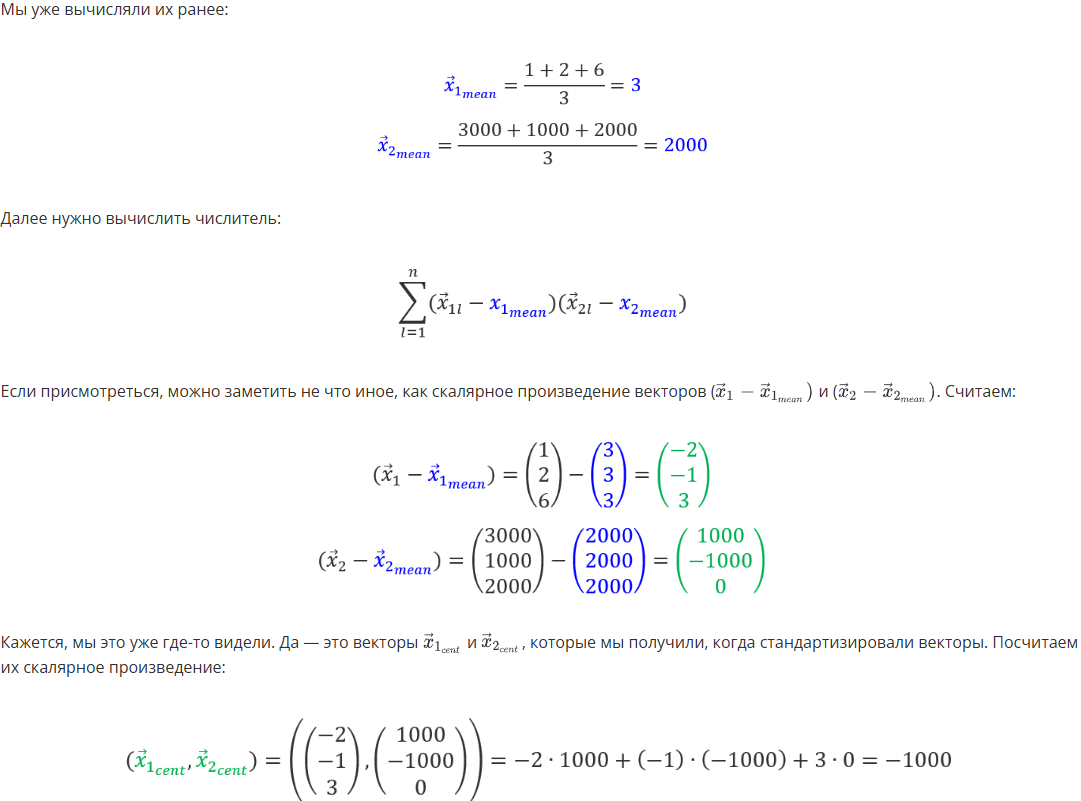
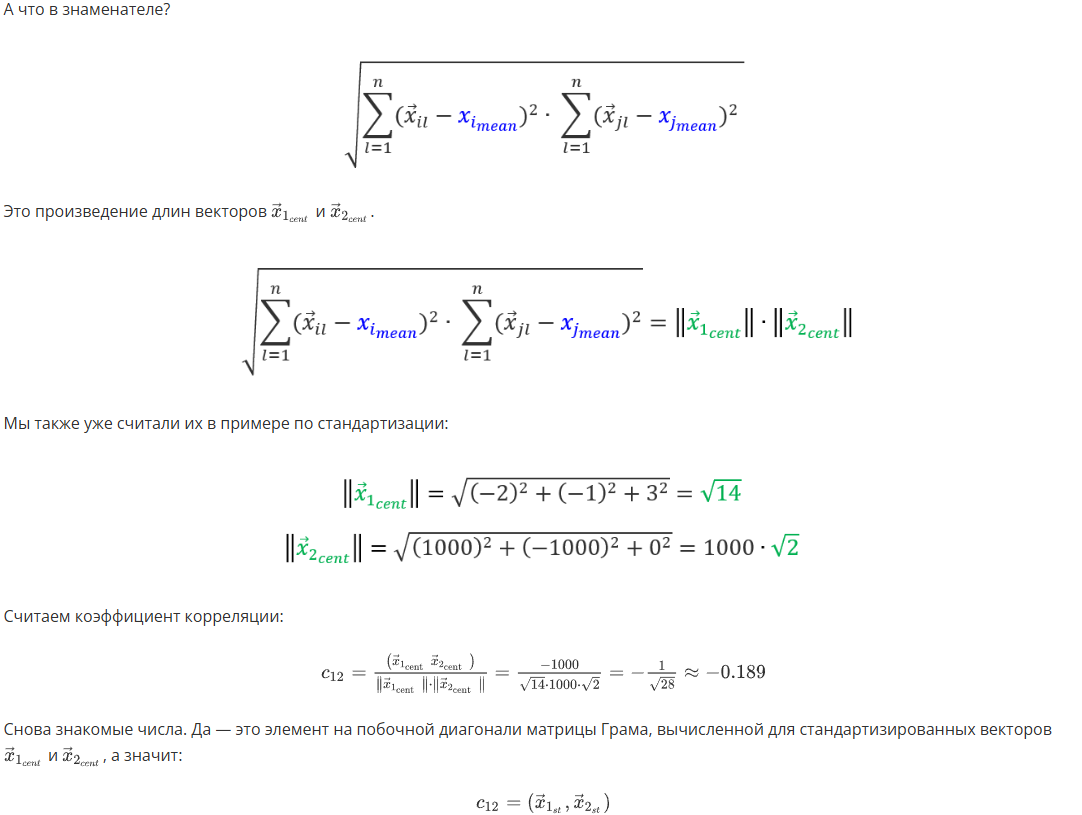
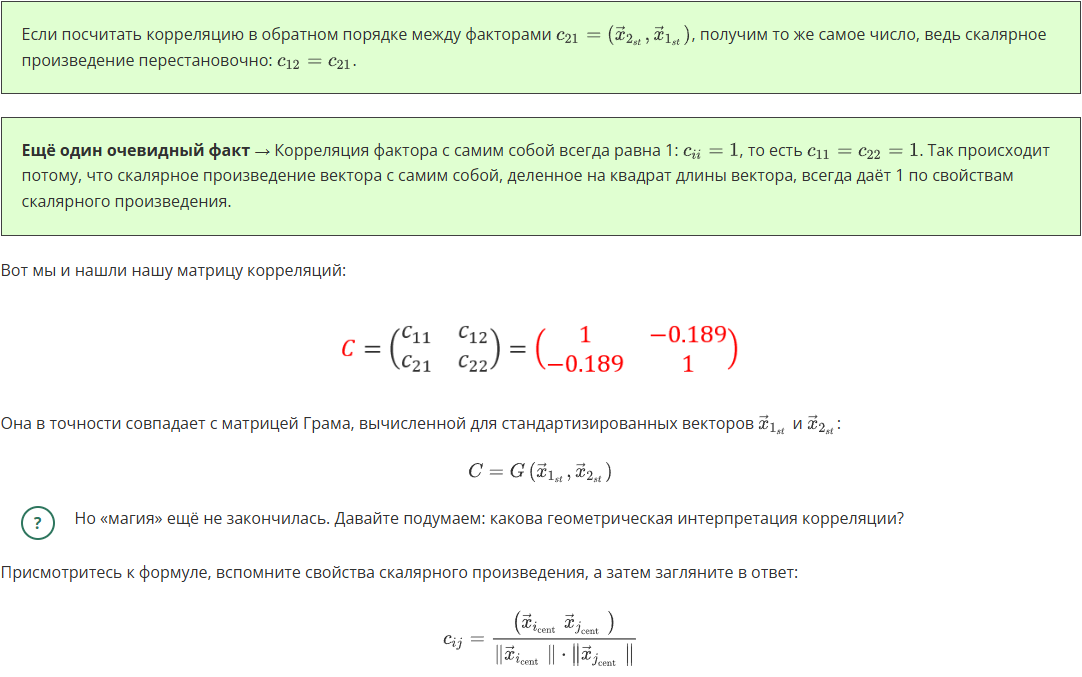
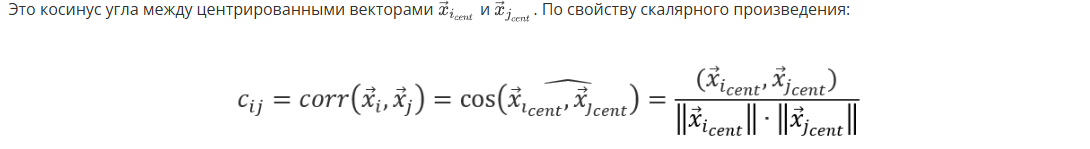
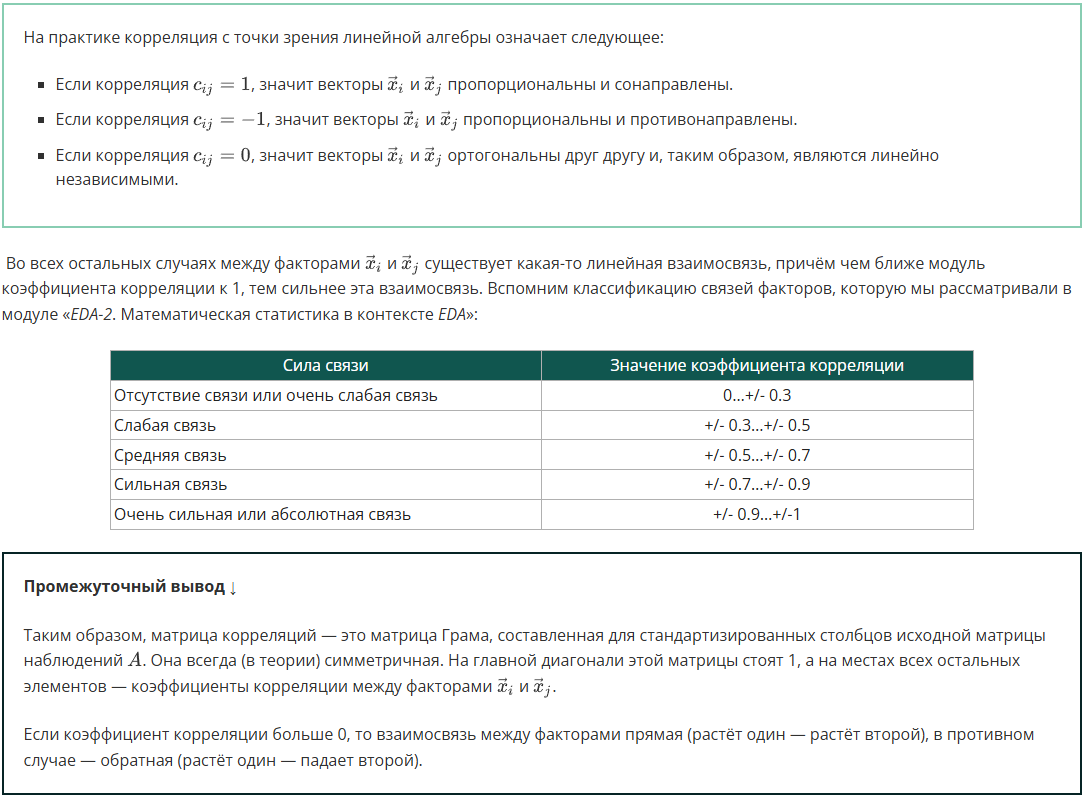
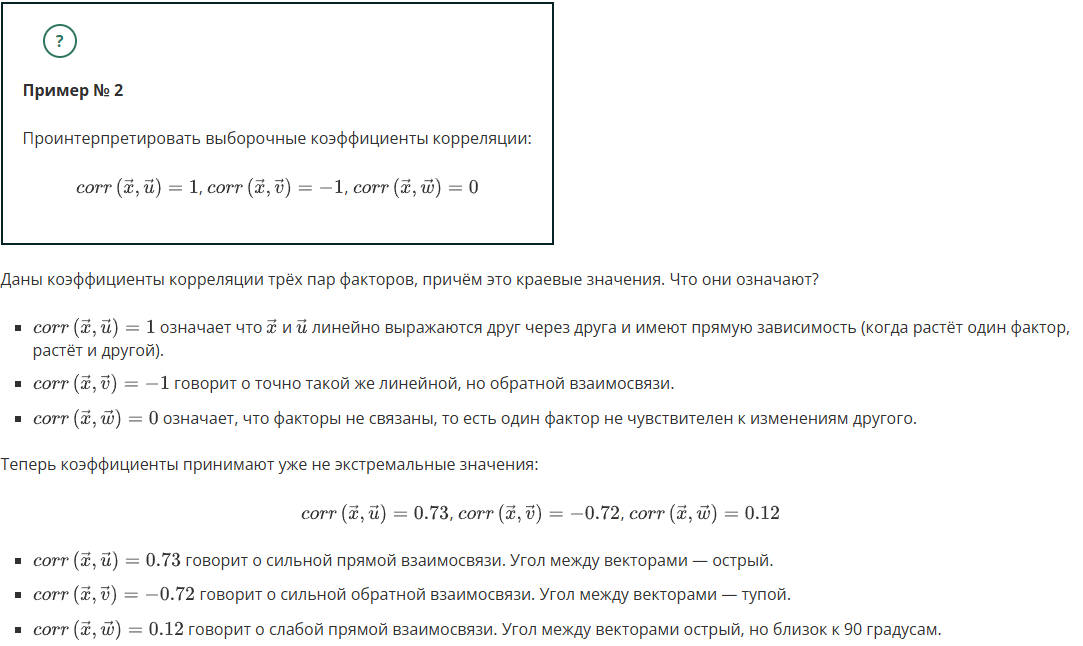

## Решение на Python

> **Примечание.** В NumPy матрица корреляций вычисляется функцией np.corrcoef():

In [9]:
x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

Получили тот же результат, что и раньше.

В Pandas матрица корреляций вычисляется методом corr(), вызванным от имени DataFrame.

## корреляционная матрица (прмер)

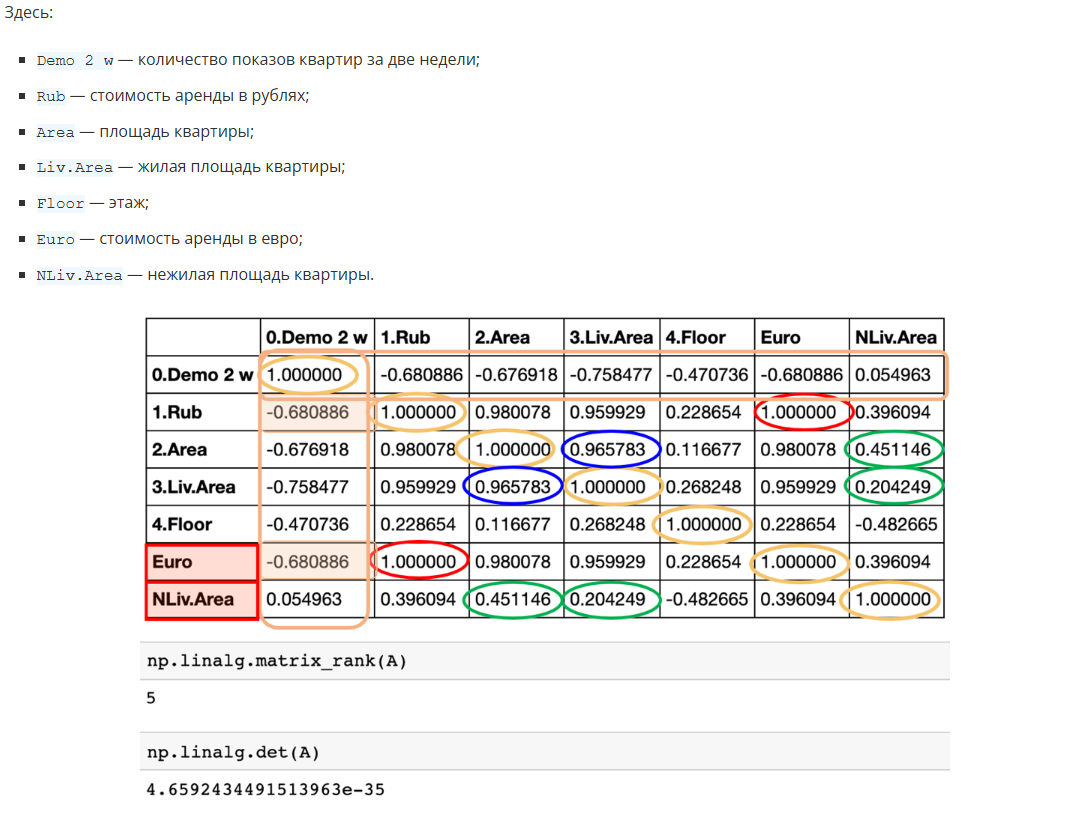
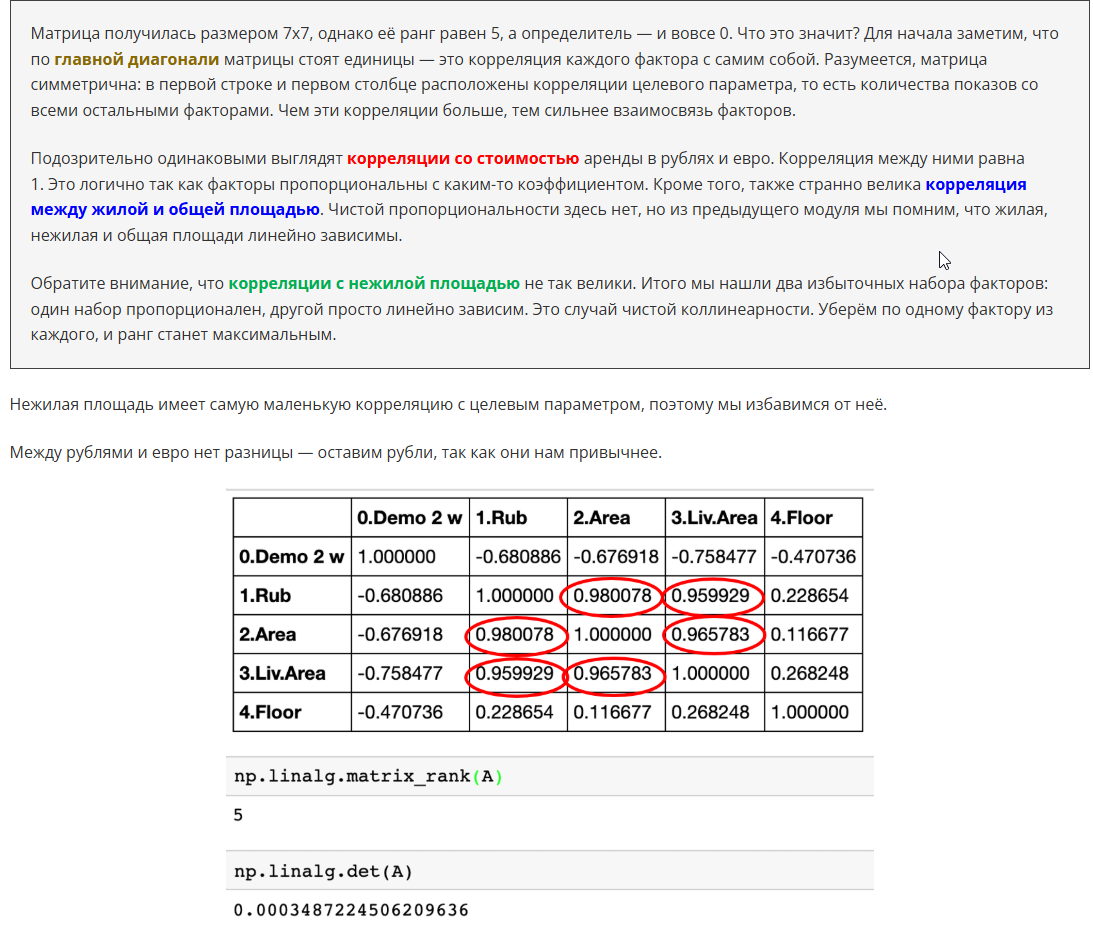
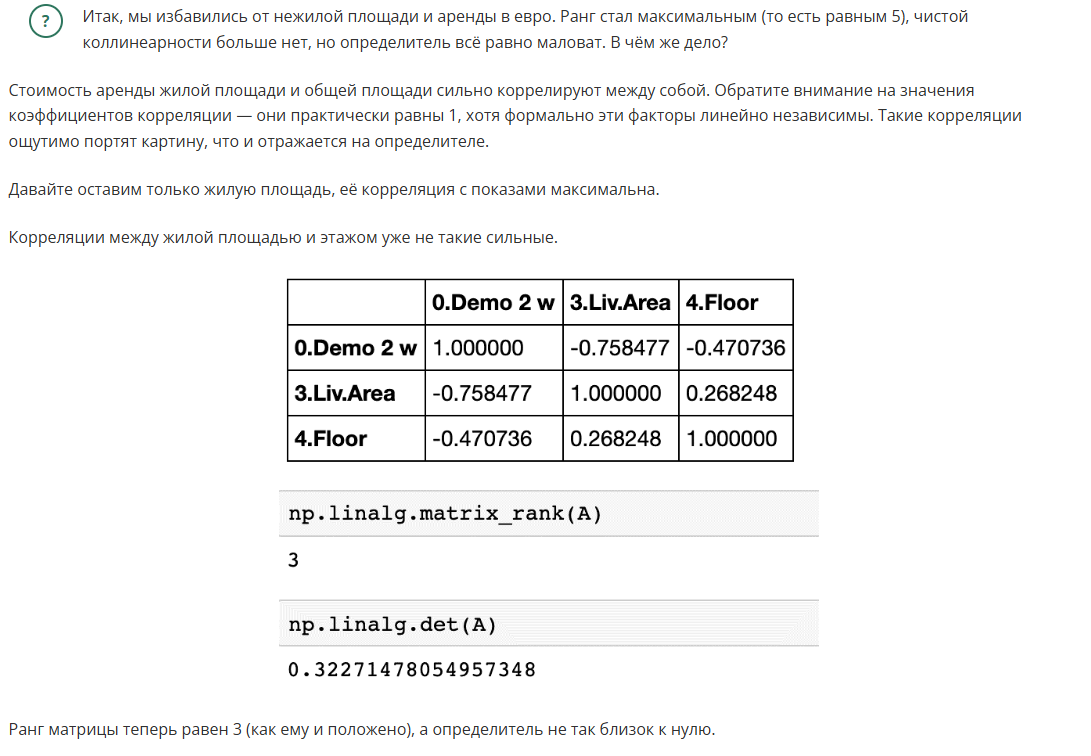
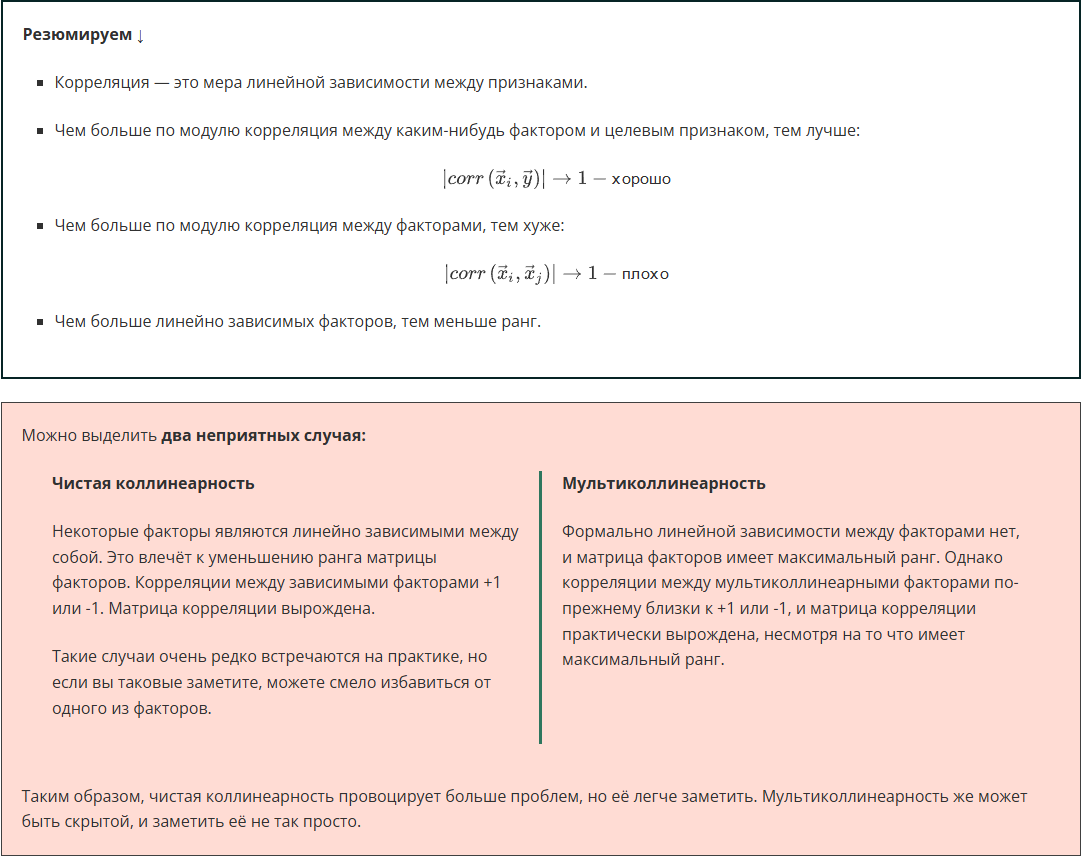


### Как обнаружить мультиколлинеарность?

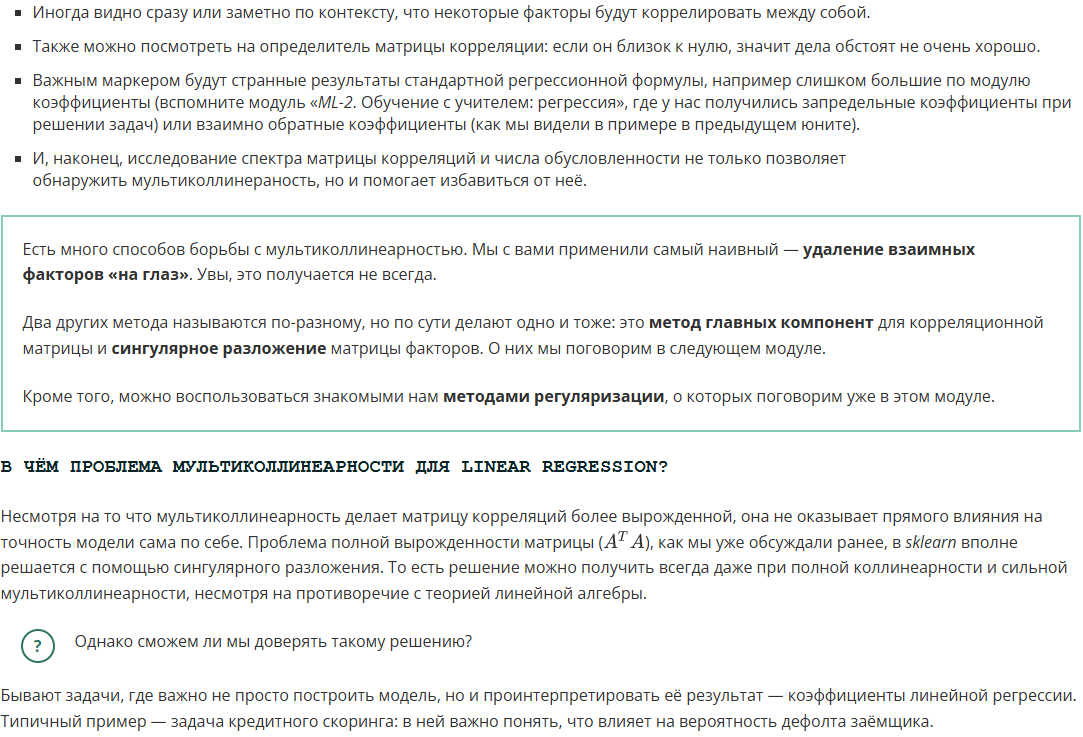

> Проблема заключается в том, что в случае мультиколлинеарности коэффициенты линейной регрессии становятся неустойчивыми. Например, признак «остаток долга/сумма выдачи» вроде бы должен приводить к уменьшению вероятности дефолта, так как клиенту остаётся выплачивать всё меньшую сумму. Однако мультиколлинеарность приводит к тому, что подобранный в ходе обучения модели коэффициент может сменить знак на противоположный, а признак, с точки зрения модели, может начать говорить об обратном: чем меньше остаётся платить, тем больше вероятность дефолта. Подобный кейс хорошо описан в этой [статье](https://habr.com/ru/company/akbarsdigital/blog/592493/) — рекомендуем с ней ознакомиться.

К тому же, чем больше в данных мультиколлинеарных факторов, тем сильнее увеличивается разброс коэффициентов регрессии. Полная коллинеарность означает, что существует бесконечное количество способов выразить один фактор через линейную комбинацию других. В свою очередь это значит, что есть бесконечное число возможных коэффициентов регрессии , таких, которые дают одни и те же результаты. 

Чем больше высококоррелированных факторов в данных, тем больше таких линейных комбинаций и тем больше коэффициенты становятся по модулю, что приводит к проблеме под названием «взрывной рост весов», когда коэффициенты регрессии начинают стремиться к бесконечности, что приводит к «поломке» даже устойчивой к вырожденным матрицам модели.

### Задание 4.8

Составьте корреляционную матрицу для системы векторов:

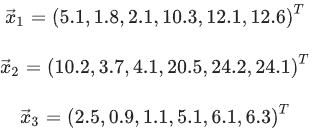

Для расчёта используйте библиотеку NumPy или Pandas.

In [12]:
x1 = np.array([5.1,1.8,2.1,10.3,12.1,12.6])
x2 = np.array([10.2,3.7,4.1,20.5,24.2,24.1])
x3 = np.array([2.5,0.9,1.1,5.1,6.1,6.3])
X = np.column_stack([x1,x2,x3])

In [16]:
X = np.corrcoef([x1, x2, x3])

1. Чему равен ранг полученной корреляционной матрицы?

In [17]:
np.linalg.matrix_rank(X)

np.int64(3)

2. Чему равен определитель полученной корреляционной матрицы? Ответ округлите до седьмого знака после точки-разделителя.

In [20]:
round(np.linalg.det(X),7)

np.float64(5e-07)